#1 Libraries Load Garney

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

#2 Dataset load garney

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/wines_SPA.csv")
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


#aba dataframe ko summary jastai rows, column, datatypes, memoryusage, non null values dekhaune

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


#aba numerical values wala columns ko statistical summary

In [ ]:
df.describe()

,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,4.254933,451.109067,60.095822,4.158427,2.946612
std,0.118029,723.001856,150.356676,0.583352,0.248202
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,389.000000,18.900000,4.000000,3.000000
50%,4.200000,404.000000,28.530000,4.000000,3.000000
75%,4.200000,415.000000,51.350000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


#aba original dataframe ko copy banaune modification changes haru garnalai taki original dataframe ma kei change nahos

In [ ]:
df_copy = df.copy()
df_copy.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


#aba data ko datatypes check garney

In [ ]:
df_copy.dtypes

,0
winery,object
wine,object
year,object
rating,float64
num_reviews,int64
country,object
region,object
price,float64
type,object
body,float64


#duplicated rows cha ki chaina check garney

In [ ]:
#Duplicate rows
df_copy.duplicated().sum()

2920

#aba yo duplicated rows lai hatauney

In [ ]:
df_copy.drop_duplicates(inplace=True)

#feri duplicated rows hatyo ki hatena check garney

In [ ]:
#Duplicate rows
df_copy.duplicated().sum()

0

#aba missing values cha chaina herney

In [ ]:
df_copy.isnull().sum()

,0
winery,0
wine,0
year,2
rating,0
num_reviews,0
country,0
region,0
price,0
type,545
body,1169


In [ ]:
#type column ko missing values lai mode use garera impute gareko kina bhaney type column numeric values bhako column nabhako le
df_copy['type'].fillna(df_copy['type'].mode()[0], inplace=True)


<ipython-input-6-3d865e7e3998>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['type'].fillna(df_copy['type'].mode()[0], inplace=True)


In [ ]:
# year column ma jamma 2 ota matra missing values cha tei bhayera drop gareko
df_copy.dropna(subset=['year'], inplace=True)

In [ ]:
#body ra acidity column ma dherai missing values cha ra yo numeric column bhako le mean use garera fill garney
df_copy['body'].fillna(df_copy['body'].mean(), inplace=True)
df_copy['acidity'].fillna(df_copy['acidity'].mean(), inplace=True)

<ipython-input-8-ecdfef49fb91>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['body'].fillna(df_copy['body'].mean(), inplace=True)
<ipython-input-8-ecdfef49fb91>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
#aba chai missing values handle bhayo ki bhayena check garney
df_copy.isnull().sum()

,0
winery,0
wine,0
year,0
rating,0
num_reviews,0
country,0
region,0
price,0
type,0
body,0


#Outliers cha chaina check garney

<Axes: title={'center': 'Wine Quality Analysis'}>

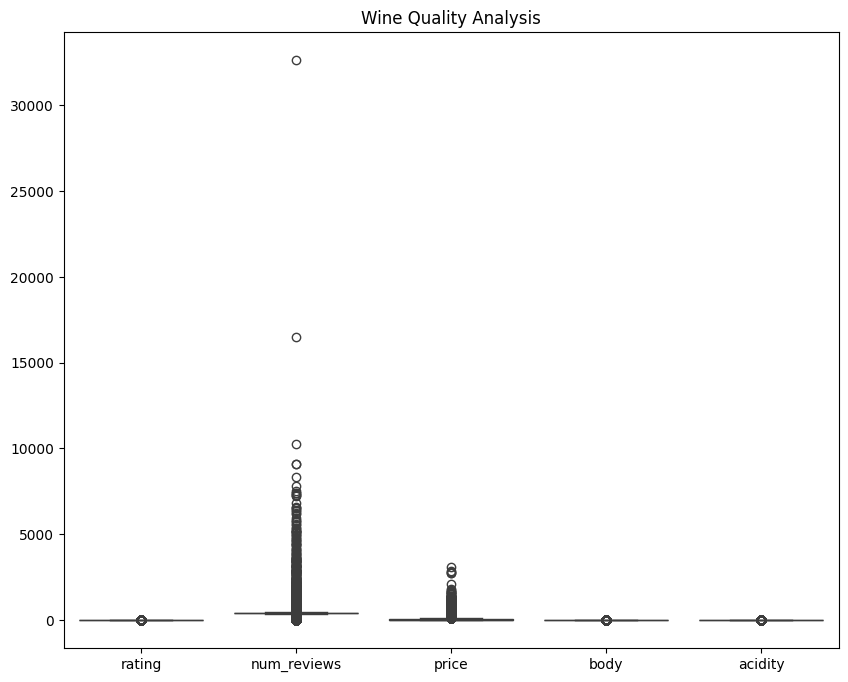

In [ ]:
figure = plt.figure(figsize=(10,8))
plt.title("Wine Quality Analysis")
sns.boxplot(df_copy)

#hamro dataset ma outliers dekhiyeko cha tesaile outliers hatauna IQR method use garney

In [ ]:
numeric_cols = ['rating', 'num_reviews', 'price', 'body', 'acidity']
for col in numeric_cols:
    Q1 = df_copy[col].quantile(0.25)
    Q3 = df_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_copy = df_copy[(df_copy[col] >= lower_bound) & (df_copy[col] <= upper_bound)]

#aba outliers hatyo ki hatena feri boxplot use garera herney

<Axes: title={'center': 'Wine Quality Analysis'}>

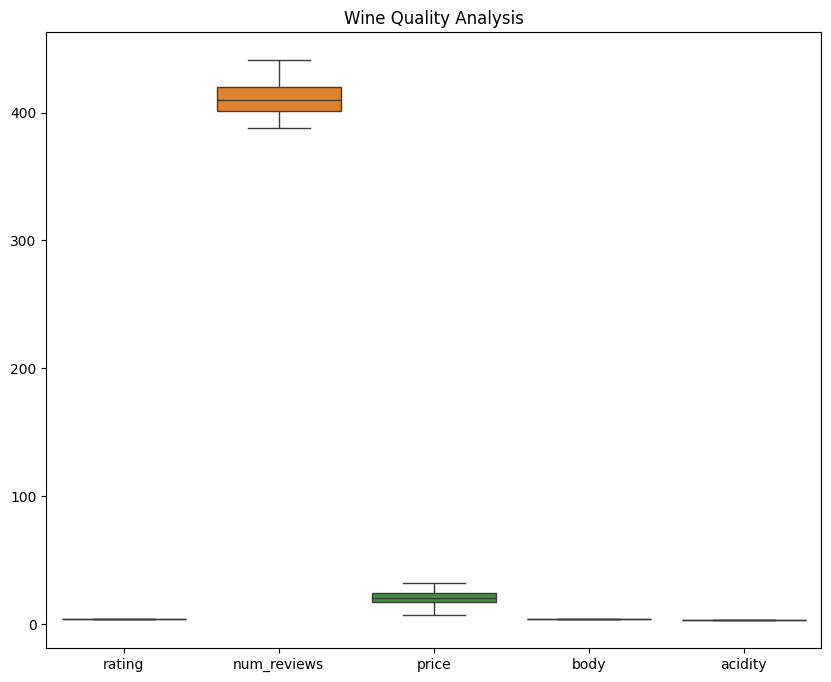

In [ ]:
figure = plt.figure(figsize=(10,8))
plt.title("Wine Quality Analysis")
sns.boxplot(df_copy)

#aba correlation analysis garney using heatmap

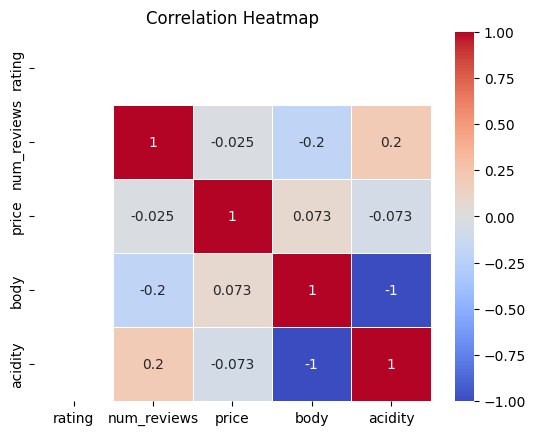

In [ ]:
# Plot heatmap
numerical_df = df_copy.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


#aba columns ko unique values check garney

In [ ]:
df_copy['rating'].value_counts()

,count
rating,
4.2,32


In [ ]:
df_copy['num_reviews'].value_counts()

,count
num_reviews,
420,8
410,4
390,4
405,2
402,2
392,2
441,1
429,1
424,1


In [ ]:
df_copy['price'].value_counts()

,count
price,
22.99,2
28.53,2
17.50,2
18.90,2
23.95,2
28.30,2
24.45,2
16.76,2
13.58,2


In [ ]:
df_copy['body'].value_counts()

,count
body,
4.158319,18
4.000000,14


In [ ]:
df_copy['winery'].value_counts()

,count
winery,
Campillo,2
Ramon Bilbao,2
La Vicalanda,2
Enrique Mendoza,2
Clos Pons,2
Sierra Cantabria,2
Mustiguillo,2
Conreria d'Scala Dei,2
La Rioja Alta,2


#aba Visualization

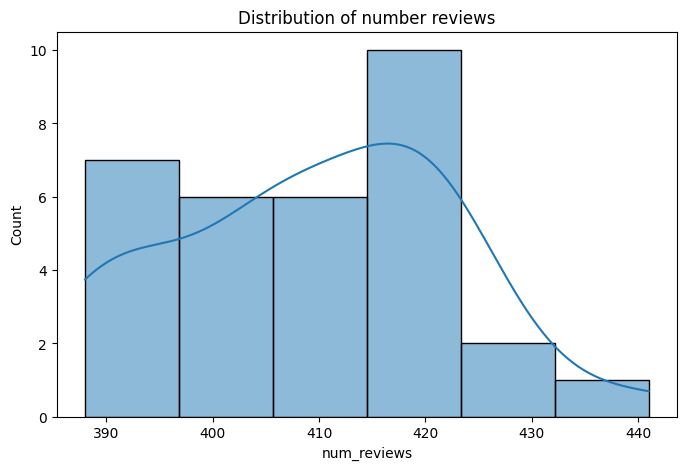

In [ ]:
#check for outliers or skewness in 'horsepower'
plt.figure(figsize=(8, 5))
sns.histplot(df_copy['num_reviews'], kde=True)
plt.title("Distribution of number reviews")
plt.show()
